In [5]:
import os
import csv

csv_dir = "../log/droid/vectors-dinov2/64-32-Uni_8_16-10-1K"

data_dict = {}

for csv_name in os.listdir(csv_dir):
    if not csv_name.endswith(".csv"):
        continue

    index_name = csv_name.split(".csv")[0]

    filepath = os.path.join(csv_dir, csv_name)
    with open(filepath, newline="", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        records = []
        for row in reader:
            records.append(tuple(map(int, row.values())))

    data_dict[index_name] = records

data_dict

{'dtw_search': [(10, 50094, 108, 1000, 100),
  (20, 102573, 186, 1000, 100),
  (50, 239698, 365, 1000, 100),
  (100, 471793, 579, 1000, 100),
  (200, 935247, 768, 1000, 100),
  (500, 2304937, 912, 1000, 100),
  (1000, 4574329, 965, 1000, 100)],
 'brute_force_search': [(0, 10486260, 1000, 1000, 100)],
 'hnsw_search': [(10, 278745, 486, 1000, 100),
  (20, 433389, 669, 1000, 100),
  (50, 782362, 905, 1000, 100),
  (100, 1263328, 989, 1000, 100),
  (200, 1965613, 997, 1000, 100),
  (500, 3763494, 1000, 1000, 100),
  (1000, 6186306, 1000, 1000, 100)]}

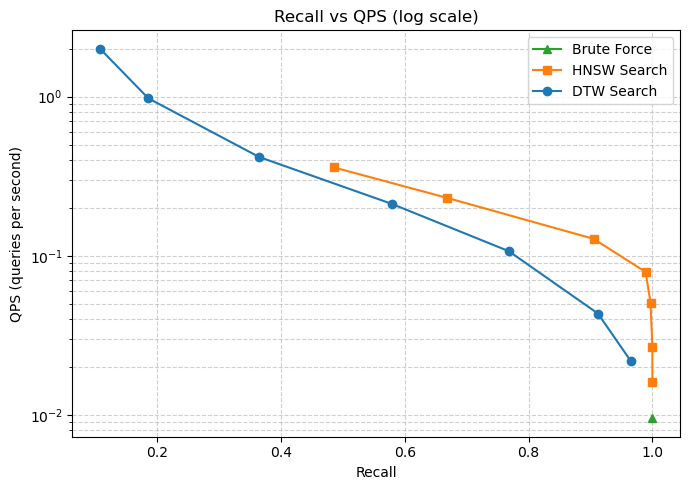

In [6]:
import matplotlib.pyplot as plt


plot_styles = {
    "brute_force": {"color": "tab:green", "marker": "^", "label": "Brute Force"},
    "hnsw": {"color": "tab:orange", "marker": "s", "label": "HNSW Search"},
    "dtw": {"color": "tab:blue", "marker": "o", "label": "DTW Search"},
}


def extract_xy(records):
    recall = [hit / total for _, _, hit, total, _ in records]
    qps = [q_num / (time / 1000) for _, time, _, _, q_num in records]
    return recall, qps


plt.figure(figsize=(7, 5))

for algm, style in plot_styles.items():
    records = data_dict[algm + "_search"]
    recall, qps = extract_xy(records)
    plt.plot(recall, qps, marker=style["marker"], color=style["color"], label=style["label"], linewidth=1.5)

plt.xlabel("Recall")
plt.ylabel("QPS (queries per second)")
plt.yscale("log")
plt.title("Recall vs QPS (log scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()